# Contemporary Models in Natural Language Processing


#### The abstract form of data is in mathematical representation. With these representation, we can perform complicated mathematical operations.   

<img src="src/two_dim_plane_points.png" width="350" style="margin-left:auto; margin-right:auto"/>


#### we often use vector formulations to make abstract representations

<img src="src/two_dim_plane_points_vec.png" width="350" style="margin-left:auto; margin-right:auto"/>


#### there is no ideal (correct) method of generating vectors that capture the complexities of natural language. Therefore, researchers invented a wide collection of algorithms to generate vectors that capturing the semantics of the language. Below are two different algorithms used widely in NLP applications today.

<img src="src/skip_gram_arch.png" width="350" style="margin-left:auto; margin-right:auto"/>


#### another algorithm is

<img src="src/cbow.png" width="350" style="margin-left:auto; margin-right:auto"/>


#### these algorithms seem intuitive and reflect human-like tasks that are used to measure information retention

<img src="src/embedding_generation.png" width="350" style="margin-left:auto; margin-right:auto"/>

#### Even though these algorithms are far from ideal (correct), they are the best algorithms we have so far. In fact, they are the essence of many large language models. Nevertheless, we need to be aware that these algorithms are based on random processes and may result in different representations every time we run them.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api

sns.set_style("darkgrid")

model = api.load("glove-wiki-gigaword-50")

# Exercise 1

### get the most similar words to 'excellent'

In [2]:
model.most_similar("excellent")

[('quality', 0.8557634353637695),
 ('good', 0.8061553835868835),
 ('skill', 0.7904783487319946),
 ('skills', 0.7725492715835571),
 ('superb', 0.7707151770591736),
 ('best', 0.7699040174484253),
 ('performance', 0.7679187059402466),
 ('suited', 0.759506106376648),
 ('terrific', 0.7582435011863708),
 ('useful', 0.7580134272575378)]

# Exercise 2

### compute the similarity between 
#### 1. 'excellent' and 'car'
#### 2. 'excellent' and 'horrible'
#### 3. 'excellent' and 'perfect'

In [3]:
model.similarity("excellent", "car")

0.33292466

In [4]:
model.similarity("excellent", "horrible")

0.21775037

In [5]:
model.similarity("excellent", "perfect")

0.728809

# Exercise 3

### compute the similarity between 100 randomly selected words

In [6]:
vocab = list(model.key_to_index.keys())
len(vocab)

400000

In [7]:
np.random.seed(2022)
sampled_words = np.random.choice(vocab, replace=False, size=100)

In [8]:
sampled_words

array(['imambara', '0.010', 's', 'six-shooter', 'fruitlessly',
       'transmissibility', 'conventionalized', '669', 'ю', 'harrass',
       'soutter', 'quadricep', 'ciskei', 'dietl', 'knightstown',
       'savviest', 'diverges', 'klatovy', 'austine', 'microbrewer',
       'natapei', 'all-instrumental', 'denture', 'causal', 'ryen',
       'baits', 'secretary', 'carla', '34.64', 'medog', 'alimentarius',
       'frantz', 'ubiquitously', 'primary', 'istana', 'erroneous',
       'musonge', 'asman', 'mjc', 'cabul', 'remonstrances', 'maudlin',
       'concerned', 'texeira', 'braincase', '3,000-page', 'isara',
       'bytyci', 'umps', 'solidarite', 'marshman', 'island/rakiura',
       'beanpot', 'directorships', 'hadrons', 'kiram', 'popularising',
       'spratlys', 'vouillé', 'porphyria', 'language-based', 'severi',
       'anglicised', 'neurath', 'kanoa', 'krantz', 'chengdu', '43-year',
       'vanderpump', 'godfathers', 'compuware', 'fusarium', 'hore',
       'ext4', 'one-make', 'virgenes',

In [9]:
vectors = model.vectors_for_all(sampled_words).vectors
vectors

array([[ 0.24513 , -0.031745, -0.22929 , ...,  0.57041 , -0.82613 ,
        -0.33817 ],
       [-0.80373 ,  0.20243 ,  1.2003  , ...,  0.38792 ,  0.29852 ,
        -0.32089 ],
       [-0.15234 ,  0.98085 ,  1.0065  , ...,  0.037843,  0.71744 ,
         0.32435 ],
       ...,
       [-1.2866  , -0.020291, -0.33626 , ...,  0.33818 , -0.25141 ,
        -0.72781 ],
       [-0.3627  ,  0.36668 ,  0.60522 , ..., -0.52059 ,  0.24528 ,
         0.39155 ],
       [ 0.27429 ,  0.06604 ,  0.29622 , ..., -0.62261 ,  0.57482 ,
        -0.3947  ]], dtype=float32)

In [10]:
pairwise_similarities = np.array(
    [model.cosine_similarities(vectors[i], vectors)
     for i in range(len(vectors))
    ]
)

# Exercise 4

### plot the distribution of pairwise similarities, and impose the words similarities between the pairs used in exercise 2

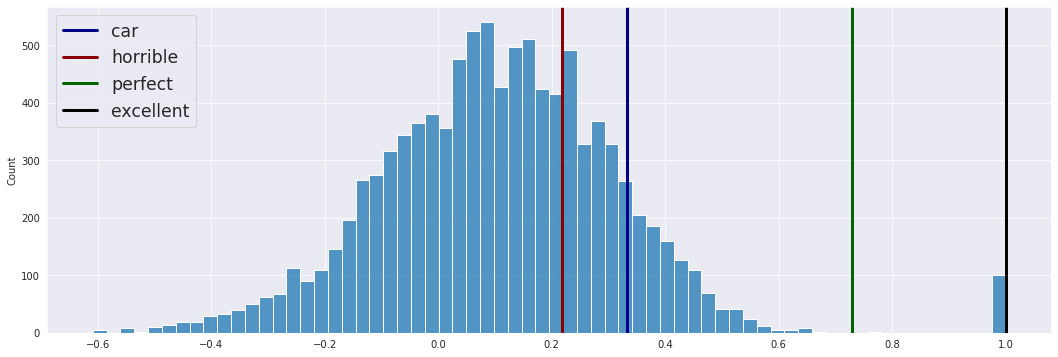

In [11]:
plt.figure(figsize=(18, 6))
sns.histplot(pairwise_similarities.reshape(-1))
plt.axvline(model.similarity("excellent", "car"), color="darkblue", label="car", lw=3)
plt.axvline(model.similarity("excellent", "horrible"), color="darkred", label="horrible", lw=3)
plt.axvline(model.similarity("excellent", "perfect"), color="darkgreen", label="perfect", lw=3)
plt.axvline(model.similarity("excellent", "excellent"), color="black", label="excellent", lw=3)
plt.legend(fontsize="xx-large");

# Extra exercise

### infer a statistical rule to identify true high similarities (caution will not be applicable on other datasets)
### build a small machine learning model to differentiate between positive and negative words